### General data exploration

In [1]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 10
np.set_printoptions(precision=4, suppress=True)
import seaborn as sns

In [3]:
data = pd.read_csv('dinesafe.csv')

In [4]:
data.columns= map(str.lower, data.columns)

In [5]:
data['inspection_date'] = pd.to_datetime(data['inspection_date'])
data['year'] = pd.DatetimeIndex(data['inspection_date']).year
data['quarter'] = pd.DatetimeIndex(data['inspection_date']).quarter
data['month'] = pd.DatetimeIndex(data['inspection_date']).month
data['week'] = pd.DatetimeIndex(data['inspection_date']).week

In [6]:
data.head(5)

,row_id,establishment_id,inspection_id,establishment_name,establishmenttype,establishment_address,latitude,longitude,establishment_status,minimum_inspections_peryear,infraction_details,inspection_date,severity,action,court_outcome,amount_fined,year,quarter,month,week
0,89798,10638787,104258049,FRESCO,Supermarket,559 SHERBOURNE ST,43.669275,-79.375251,Pass,2,NaN,2018-07-06,NaN,NaN,NaN,NaN,2018,3,7,27
1,81982,10599890,103998046,MAYWAH FOODS,Food Store (Convenience / Variety),20 CLAIREPORT CRES,43.746679,-79.632725,Pass,1,NaN,2017-05-25,NaN,NaN,NaN,NaN,2017,2,5,21
2,81983,10599890,104223135,MAYWAH FOODS,Food Store (Convenience / Variety),20 CLAIREPORT CRES,43.746679,-79.632725,Pass,1,NaN,2018-05-18,NaN,NaN,NaN,NaN,2018,2,5,20
3,13393,9031951,103823167,CLAIREPORT PLACE BANQUET & CONVENTION CENTRE,Banquet Facility,65 CLAIREPORT CRES,43.746105,-79.631265,Pass,3,NaN,2016-10-02,NaN,NaN,NaN,NaN,2016,4,10,39
4,13394,9031951,103956830,CLAIREPORT PLACE BANQUET & CONVENTION CENTRE,Banquet Facility,65 CLAIREPORT CRES,43.746105,-79.631265,Pass,3,NaN,2017-04-27,NaN,NaN,NaN,NaN,2017,2,4,17


In [7]:
data.shape

(90520, 20)

In [8]:
data.describe()

,row_id,establishment_id,inspection_id,latitude,longitude,minimum_inspections_peryear,amount_fined,year,quarter,month,week
count,90520.000000,9.052000e+04,9.052000e+04,90520.000000,90520.000000,90520.000000,263.000000,90520.000000,90520.000000,90520.000000,90520.000000
mean,45260.500000,1.018466e+07,1.040637e+08,43.699607,-79.395151,2.342830,218.659696,2017.252165,2.502784,6.515234,26.609722
std,26131.017521,5.903924e+05,1.419047e+05,0.054377,0.081528,0.627003,271.487472,0.669984,1.116435,3.414647,14.803786
min,1.000000,1.222579e+06,1.033519e+08,43.586770,-79.632725,1.000000,0.000000,2016.000000,1.000000,1.000000,1.000000
25%,22630.750000,1.025015e+07,1.039429e+08,43.654925,-79.438232,2.000000,60.000000,2017.000000,2.000000,4.000000,14.000000
50%,45260.500000,1.045186e+07,1.040687e+08,43.680659,-79.393629,2.000000,120.000000,2017.000000,2.000000,6.000000,26.000000
75%,67890.250000,1.055421e+07,1.041859e+08,43.743924,-79.350568,3.000000,305.000000,2018.000000,4.000000,10.000000,40.000000
max,90520.000000,1.064847e+07,1.043102e+08,43.839139,-79.130693,3.000000,1875.000000,2018.000000,4.000000,12.000000,52.000000


In [9]:
data.isnull().sum().sort_values(ascending=False).head(8)

amount_fined          90257
court_outcome         89739
action                28822
severity              28822
infraction_details    28822
week                      0
latitude                  0
establishment_id          0
dtype: int64

### Q1: what busienss will have highest of inspection frequency per year¶

In [10]:
count_establishment = data.groupby(['establishment_address', 'establishment_name'])['inspection_id'].nunique()
count_establishment

establishment_address  establishment_name                     
1 ADELAIDE ST E        CRAFT BEER MARKET RESTAURANT & BAR         3
                       INTERNATIONAL NEWS                         1
                       STARBUCKS                                  2
                       TOUCH                                      5
1 AUSTIN TER           BLUE BLOOD STEAKHOUSE                      2
                                                                 ..
997 BAY ST             STRIKER SPORTSBAR                          4
998 DOVERCOURT RD      SUNSHINE VARIETY STORE & GROCERY           4
998 KINGSTON RD        FRESHII                                    2
998 QUEEN ST W         K & N SUPERMARKET                          3
998 ST CLAIR AVE W     MACELLERIA SAN GABRIELE BUTCHER&  GRILL    4
Name: inspection_id, Length: 16246, dtype: int64

In [11]:
freq = count_establishment.to_frame(name = 'freq_per_year')

In [12]:
freq_order=freq.sort_values(['freq_per_year'],ascending = False)
freq_order['freq_per_year']=freq_order['freq_per_year']/2
freq_top_10 = freq_order[:10]
freq_top_10

,,freq_per_year
establishment_address,establishment_name,
3401 DUFFERIN ST,VILLA MADINA MEDITERRANEAN CUISINE,9.5
70 HUMBERLINE DR,DEERWOOD CREEK COMMUNITY CARE,8.0
1955 QUEEN ST E,POPEYES LOUISIANA KITCHEN,8.0
4466 SHEPPARD AVE E,FARM FRESH SUPERMARKET,7.5
4810 SHEPPARD AVE E,BABU CATERING & TAKE OUT,7.0
394 BLOOR ST W,SAKURA SUSHI,7.0
800 DUNDAS ST W,OLD SCHOOL,6.5
288 WILSON AVE,JOLLYTOPS,6.0
550 BAYVIEW AVE,CAFE BELONG,6.0


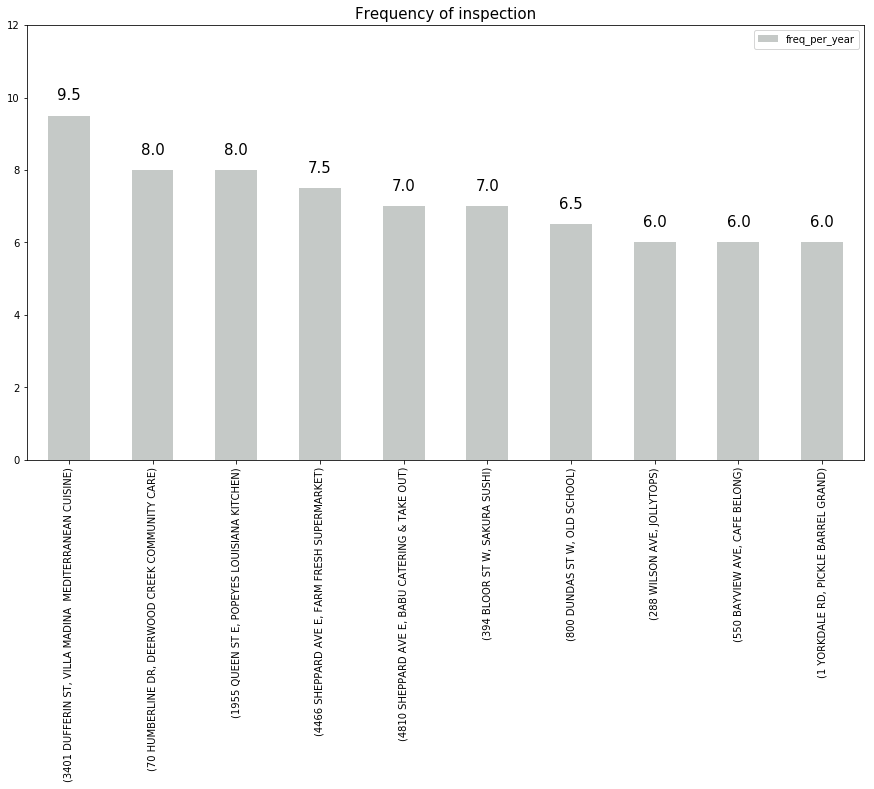

In [13]:
ax1=freq_top_10.plot.bar(color='xkcd:silver',figsize=(15,8))
#cleaned_10.plot.bar(x='infraction_details', y='size',figsize=(12,6),color='xkcd:silver')
plt.title('Frequency of inspection', fontsize = 15)
plt.xlabel('',fontsize=15)
plt.ylabel('',fontsize=15)
ax1.set_ylim(0,12)
for p in ax1.patches:
    ax1.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 20),
                 textcoords='offset points')


### Q2. Scoring by establishment

In [14]:
data['score'] = pd.np.where(data.severity.str.contains("Minor"), "1",
                   pd.np.where(data.severity.str.contains("S - Significant"), "2",
                   pd.np.where(data.severity.str.contains("C - Crucial"), "3", "0")))

In [15]:
def label_severity(row):
 if row['severity'] == 'M - Minor':
   return 1
 if row['severity']== 'S - Significant':
   return 2  
 if row['severity']== 'C - Crucial':
   return 3
 return 0  

data['score']=data.apply(lambda row: label_severity(row),axis=1) 

In [16]:
data.describe()

,row_id,establishment_id,inspection_id,latitude,longitude,minimum_inspections_peryear,amount_fined,year,quarter,month,week,score
count,90520.000000,9.052000e+04,9.052000e+04,90520.000000,90520.000000,90520.000000,263.000000,90520.000000,90520.000000,90520.000000,90520.000000,90520.000000
mean,45260.500000,1.018466e+07,1.040637e+08,43.699607,-79.395151,2.342830,218.659696,2017.252165,2.502784,6.515234,26.609722,0.943659
std,26131.017521,5.903924e+05,1.419047e+05,0.054377,0.081528,0.627003,271.487472,0.669984,1.116435,3.414647,14.803786,0.848391
min,1.000000,1.222579e+06,1.033519e+08,43.586770,-79.632725,1.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,0.000000
25%,22630.750000,1.025015e+07,1.039429e+08,43.654925,-79.438232,2.000000,60.000000,2017.000000,2.000000,4.000000,14.000000,0.000000
50%,45260.500000,1.045186e+07,1.040687e+08,43.680659,-79.393629,2.000000,120.000000,2017.000000,2.000000,6.000000,26.000000,1.000000
75%,67890.250000,1.055421e+07,1.041859e+08,43.743924,-79.350568,3.000000,305.000000,2018.000000,4.000000,10.000000,40.000000,2.000000
max,90520.000000,1.064847e+07,1.043102e+08,43.839139,-79.130693,3.000000,1875.000000,2018.000000,4.000000,12.000000,52.000000,3.000000


In [17]:
data[data['severity'].isnull()].describe()

,row_id,establishment_id,inspection_id,latitude,longitude,minimum_inspections_peryear,amount_fined,year,quarter,month,week,score
count,28822.000000,2.882200e+04,2.882200e+04,28822.000000,28822.000000,28822.000000,0.0,28822.000000,28822.000000,28822.000000,28822.000000,28822.0
mean,43665.328013,1.013247e+07,1.040559e+08,43.691511,-79.400042,2.080980,NaN,2017.205121,2.566095,6.708625,27.424190,0.0
std,26938.221798,6.345384e+05,1.451706e+05,0.053693,0.090013,0.635209,NaN,0.679706,1.128680,3.455703,14.991461,0.0
min,2.000000,1.222579e+06,1.033519e+08,43.586770,-79.632725,1.000000,NaN,2016.000000,1.000000,1.000000,1.000000,0.0
25%,19271.250000,1.019387e+07,1.039302e+08,43.649920,-79.453055,2.000000,NaN,2017.000000,2.000000,4.000000,14.000000,0.0
50%,43147.500000,1.043726e+07,1.040599e+08,43.674400,-79.394770,2.000000,NaN,2017.000000,3.000000,7.000000,28.000000,0.0
75%,67595.750000,1.055269e+07,1.041789e+08,43.730931,-79.347056,2.000000,NaN,2018.000000,4.000000,10.000000,41.000000,0.0
max,90520.000000,1.064847e+07,1.043102e+08,43.839139,-79.130693,3.000000,NaN,2018.000000,4.000000,12.000000,52.000000,0.0


In [18]:
sum_score = data.groupby(['establishment_id', 'establishment_name'])['score'].sum()
top_score = sum_score.to_frame(name = 'score')
top_score=top_score.sort_values(['score'],ascending = False)
top_score

,,score
establishment_id,establishment_name,
10493249,VILLA MADINA MEDITERRANEAN CUISINE,132
10376744,MUSTAFA,104
9016350,TIMES SQUARE DINER,89
10488667,TASTY BBQ SEAFOOD RESTAURANT,89
9018592,PHO MI ASIA,86
...,...,...
10522277,Tim Hortons,0
9070159,VIVA TASTINGS,0
10522158,Star Bucks Coffee,0


In [19]:
total_inspection = data.groupby(['establishment_id', 'establishment_name'])['inspection_id'].nunique()

In [20]:
total_ins = total_inspection.to_frame(name = 'num_inspection')
total_ins=total_ins.sort_values(['num_inspection'],ascending = False)
total_ins

,,num_inspection
establishment_id,establishment_name,
10493249,VILLA MADINA MEDITERRANEAN CUISINE,19
10635004,POPEYES LOUISIANA KITCHEN,16
10336522,FARM FRESH SUPERMARKET,15
10399527,BABU CATERING & TAKE OUT,14
10574131,SAKURA SUSHI,14
...,...,...
9010430,MOUNT PLEASANT THEATRE,1
10327382,SHOP 'N' MILK,1
9010429,MOUNT PLEASANT PHARMACY,1


In [24]:
temp = pd.merge(total_ins, top_score, on=('establishment_id','establishment_name'), how='inner')
temp['Avg_Score'] = temp['score']/temp['num_inspection']
avgScore = temp.sort_values(['Avg_Score'],ascending = False)
avgScore.head(10)

,,num_inspection,score,Avg_Score
establishment_id,establishment_name,,,
10624237,Madhuram Inc.,1,50,50.000000
10640328,IDA MILK & VARIETY,1,17,17.000000
10630489,JERK PARADISE,1,16,16.000000
10642782,BASSO,2,32,16.000000
10636757,THE U KITCHEN INC,1,15,15.000000
10645813,FAVELA,1,13,13.000000
10627798,GRILL GATE,1,13,13.000000
10275385,BAGEL WORLD,6,73,12.166667
10629500,GINO'S PIZZA,1,12,12.000000
